In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 4. Hydrogen Atom: Linear Regression

#### Gradient Descent

We want to use gradient descent to compute the optimized coefficients for our guess of the wavefunction:

$$
u(r) = \sum_{m=0}^{M} \theta_m r^m
$$

This guess is motivated by the Stone-Weierstrass Theorem, which states that we can represent the function by an infinite power series.

Here we have a cost function:

$$
J(\theta_0, \theta_1, \dots, \theta_M)
$$

and we for each iteration of gradient descent we update $\theta_m$:

$$
\begin{align}
\theta_0^{(k+1)} &= \theta_0^{(k)} - \alpha \dfrac{\partial J}{\partial \theta_0} \\
\theta_1^{(k+1)} &= \theta_1^{(k)} - \alpha \dfrac{\partial J}{\partial \theta_1} \\
\vdots \\
\theta_M^{(k+1)} &= \theta_M^{(k)} - \alpha \dfrac{\partial J}{\partial \theta_M} \\
\end{align}
$$

In [18]:
import linear_regression_hydrogen as lrh
import hydrogen_gradient_descent as hygrad

In [19]:
params = {'legend.fontsize': 18,
          'axes.labelsize': 18,
          'axes.titlesize': 18,
          'figure.titlesize': 20,
          'xtick.labelsize' :15,
          'ytick.labelsize': 15,
          'mathtext.fontset': 'custom',
          'mathtext.rm': 'Bitstream Vera Sans',
          'mathtext.it':'Bitstream Vera Sans:italic',
          'grid.color': 'k',
          'grid.linestyle': ':',
          'grid.linewidth': 0.5
         }
plt.rcParams.update(params)

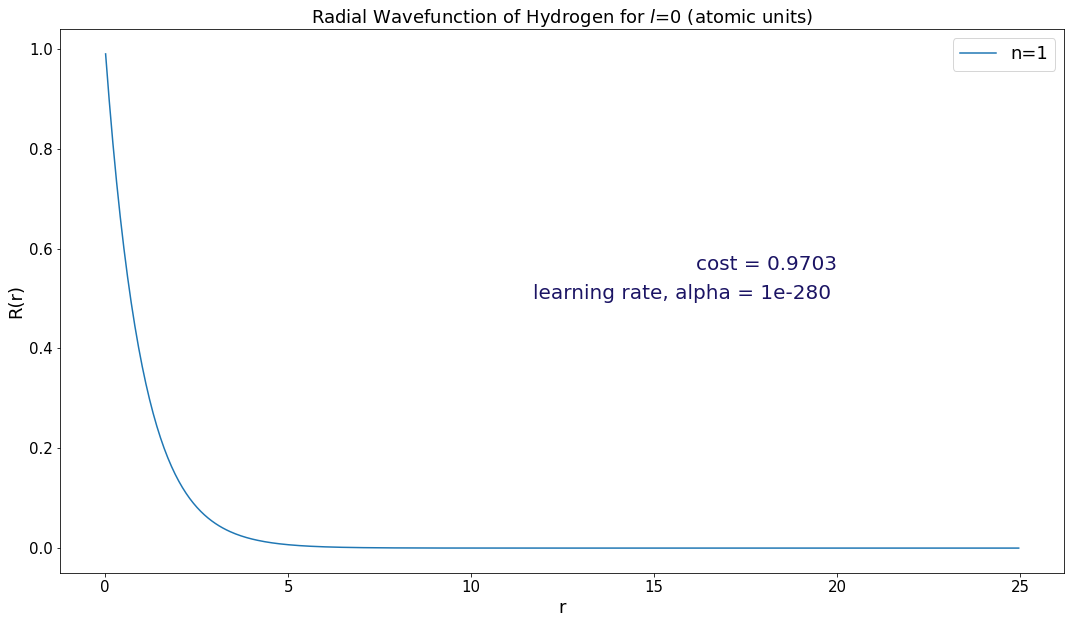

In [20]:
polynomial_degree = 100
r_data = np.arange(0.01, 25, 0.05)
num_data_points = len(r_data)
n = 1
l = 0
hydrogen = hygrad.Hydrogen(azimuthal_number=l, principal_number=n)
R_matrix = lrh.create_R_matrix(num_data_points, polynomial_degree, r_data)
T_matrix = lrh.create_T_matrix(num_data_points, polynomial_degree, r_data)
coefficients = np.zeros(polynomial_degree)
for i in range(1, polynomial_degree):
    coefficients[i] = (-1)**(i-1)*(1/math.factorial(i-1))
u_pred = lrh.get_R_vector(r_data, coefficients)
alpha = 10**-280
max_iterations = 500
max_cost = .1
coefficients, cost = hygrad.gradient_descent(coefficients, alpha, max_cost, max_iterations, r_data, hydrogen, lrh.get_R_vector,
                                             lrh.get_T_vector, lrh.cost_function_deriv, u_pred, R_matrix, T_matrix)

fig = plt.figure(figsize=(18,10))
plt.plot(r_data, u_pred/r_data, label=f"n={n}")
plt.xlabel("r")
plt.ylabel("R(r)")
plt.title(f"Radial Wavefunction of Hydrogen for $l$={l} (atomic units)")
plt.legend()
plt.text(20, 0.55, f'cost = {np.round(cost, 4)}',
        verticalalignment='bottom', horizontalalignment='right',
        color="#1B1464", fontsize=20)
fig.text(0.72, 0.5, f'learning rate, alpha = {alpha}',
    verticalalignment='bottom', horizontalalignment='right',
    color="#1B1464", fontsize=20)

plt.show()